***

* [Outline](../0_Introduction/0_introduction.ipynb)
* [Glossary](../0_Introduction/1_glossary.ipynb)
* [2. Mathematical Groundwork](2_0_introduction.ipynb)
    * Previous: [2.8 The Discrete Fourier Transform (DFT) and the Fast Fourier Transform (FFT)](2_8_the_discrete_fourier_transform.ipynb)
    * Next: [2.10 Linear Algrebra](2_10_linear_algebra.ipynb)

***

## 2.9 Sampling theory

This section describes the concept of sampling, Nyquist rate and aliasing in fundamental signal processing. 

Some fundamental questions we will be answering in this section are:

1. What is sampling and what does it do?
2. What are the best criteria for perfect sampling?
3. Does ideal sampling exist in practice?

Basically, sampling is the process by which continuous time signals or analog signals (such as the human voice) are turned into discrete time signals. By sampling a continuous, time variant signal, we can save and process (often with computers) the resulting discretised signal. To reconstruct the continuous time signal, we apply the Fourier transform to the sampled signal and apply filter theory in order to bandlimit the results.

Before we start the analysis of sampling, the following definitions are required.

1. We will refer to a continuous time variant signal as a $\textbf{physical signal}$.
2. We will refer to a discretised signal as a $\textbf{sampled signal}$.

The process of sampling is easy to represent mathematically. Given a physical signal, $d_r (x)$, and its assosciated sampled signal, $d_s (x)$, the sampled signal is expressed as

$$
\begin{alignat}{2}
d_s(x) &= s(x) d_r(x),~~~~ Eq.1
\end{alignat}
$$

where $s(x)=\sum_{k=-\infty}^{+\infty}\delta(x-k\Delta x)$. This is an infinite series of Delta functions known as a Dirac Comb. The Delta functions are regularly spaced at an interval of $\Delta x$ and $k$ labels the samples. In practice we are limited to a finite number, $n$, of samples.

<span style="background-color:cyan">JSK + LB: Removed n in the definition of the sine wave.</span>

To see how this happens pratically, consider a sine waveform $d_r=\sin(2\pi f x)$ at a frequency $f=4 Hz$. This waveform is produced and plotted for the range $x \in [0,1]$ by the following code.

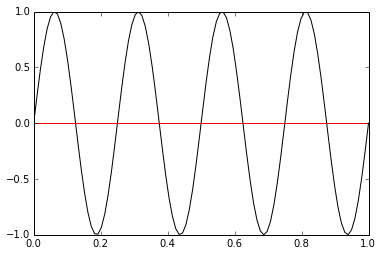

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

f = 4;   # frequency of the physical signal
plt.axhline(y=0,xmin=0,xmax=250,color='r')
plt.plot(np.linspace(0,1,100.),np.sin(2*np.pi*f*np.linspace(0,1,100.)), 'k')

plt.show()

Now supose the above sine wave is the physical signal i.e the continuous time variant signal. We sample the physical signal at intervals of $\Delta x=1/80$, $\Delta x=1/50$ and $\Delta x=1/25$. Note that since the domain remains fixed (i.e. $x \in [0,1]$) the number of samples is given by $n=80$, $n=50$ and $n=25$ respectively. This illustrated by the following code.

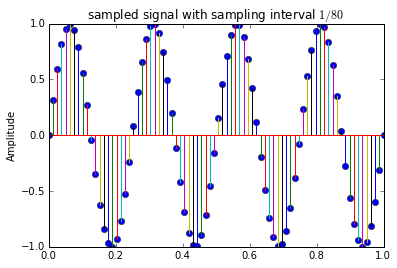

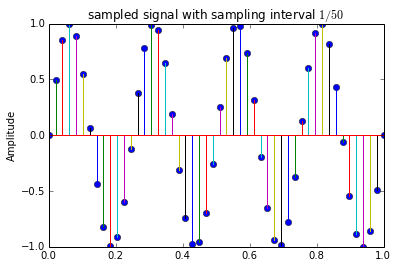

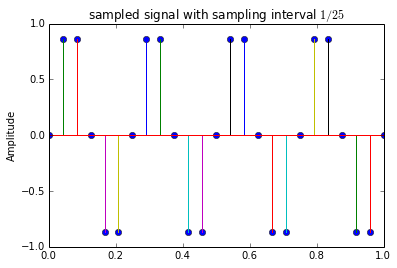

In [11]:
y = np.sin(2*np.pi*f*np.linspace(0,1,80.))
plt.stem(np.linspace(0,1,80.),y,'-')
plt.ylabel("Amplitude")
plt.title("sampled signal with sampling interval $1/80$")
plt.show()

y = np.sin(2*np.pi*f*np.linspace(0,1,50.))
plt.stem(np.linspace(0,1,50.),y,'-')
plt.ylabel("Amplitude")
plt.title("sampled signal with sampling interval $1/50$")
plt.show()

y = np.sin(2*np.pi*f*np.linspace(0,1,25.))
plt.stem(np.linspace(0,1,25.),y,'-')
plt.ylabel("Amplitude")
plt.title("sampled signal with sampling interval $1/25$")
plt.show()

There are clear gaps between the samples. These gaps are points where the physical signal was not sampled. Keep in mind that the gaps represent all the information lost during the sampling process. Also note that as the number of sampled points decreases, it becomes harder to recognise the original signal.

In general, to preserve all the information contained in the signal, the sampling rate ($f_{N}$) must equal or exceed twice the maximum frequency present in the signal ($f_{N} = 2f_{max}$). Since the maximum signal frequency is $f_{max}=4 Hz$, the required sampling frequency is $f_{N}=8 Hz$ or greater (i.e. a sampling interval of $\Delta x\leq \frac{1}{f_{N}}$). This is known as the Nyquist-Shannon sampling theorem.  We refer to $f_{N}$ as the Nyquist rate. However there are certain exceptions to this rule where it is necessary to sample at a rate strictly larger than $f_{N}$ (see for example [EXREF](https://www.quora.com/What-is-the-intuitive-meaning-of-the-Nyquist%E2%80%93Shannon-sampling-theorem)).

Undersampling (sampling at rates less than $f_{N}$) results in an effect known as aliasing.

# Aliasing and demonstration

Let us suppose we want to sample a Gaussian waveform $d_r (x) = e^{\frac{-(x-\mu)^2}{2\sigma^2}}$

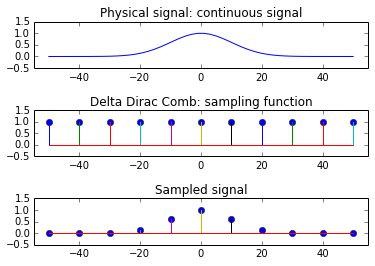

In [18]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

x = np.linspace(-50,50,50)
mu = 0.
sig = 10.
g = gaussian(x,mu,sig)

fig = plt.figure()
fig.subplots_adjust(hspace=.9)

ax1 = fig.add_subplot(311)
ax1.plot(x,g)
plt.ylim(-0.5,1.5)
plt.xlim(-55,55)
#ax1.axhline(y=0., xmin=-30., xmax=50., color = 'r')
plt.title("Physical signal: continuous signal")


## delta dirac comb parameter
step = 10 # sampling step
x1 = np.arange(-50,51,step)
deltacom = np.ones_like(x1)
ax2 = fig.add_subplot(312)
markerline, stemlines, baseline = ax2.stem(x1, deltacom, '-')
plt.title("Delta Dirac Comb: sampling function")
plt.ylim(-0.5,1.5)
plt.xlim(-55,55)


## sampled Gaussian
ax3 = fig.add_subplot(313)
markerline, stemlines, baseline = ax3.stem(x1, gaussian(x1,mu,sig), '-')
plt.ylim(-0.5,1.5)
plt.xlim(-55,55)
plt.title("Sampled signal")
plt.show()


The physical signal (top plot) is multiplied by the Dirac Comb function (middle plot), which results in the observed signal (bottom centre).

Note from the example that $\Delta x = 10$ is the sampling interval or sampling step.

Since we are interested in the Fourier  and the time-domain signal, the Fourier transform is applied to Eq.1. According to the convolution theorem [EXREF](2_7_fourier_theorems.ipynb#math:sec:convolution_theorem) <!--\ref{math:sec:convolution_theorem}-->, Eq.1 becomes 

$$
\begin{alignat}{2}
\mathcal{F} \{d_s \}(y)  &=\Big(\mathcal{F} \big\{s\big\}\circ \mathcal{F} \big\{d_r\big\}\Big)(y),~~~~ Eq.2
\end{alignat}
$$

where $\mathcal{F}^{}$ denotes the Fourier transform and $\circ$ is the convolution operation. 
The Fourier transform of a Dirac Comb of regular spacing $\Delta x$, is a Dirac Comb of regular spacing $\Delta y$

$$
\begin{alignat}{2}
\mathcal{F}\big\{s\big\} & =\Delta y\sum_{k=-\infty}^{+\infty}\delta(y-k\Delta y),~~~~ Eq.3
\end{alignat}
$$

where $\Delta y= 2\pi/ \Delta x$  is the sampling rate. Combining Eq.4 and Eq.5 we obtain the following

$$
\begin{alignat}{2}
\mathcal{F}^{}\big\{d_s\big\}(y) &=\Big(\Delta y \sum_{k=-\infty}^{+\infty}\delta(y-k\Delta y)\Big)\circ\Big(\mathcal{F}\{d_r\}(y)\Big)\\
				  &=\Delta y \sum_{k=-\infty}^{+\infty}\mathcal{F}\{d_r\}(y-k\Delta y).~~~~ Eq.4
\end{alignat}
$$

See Appendix A for the detailed proof of Eq.5 and Eq.6.

For completeness, the spectrum from the point $k=0$ in Eq.6 can be separated 
\begin{alignat}{2}
\mathcal{F}^{}\big\{d_s\big\}(y) &= \Delta y\mathcal{F}^{}\big\{d_r\big\}(y) + \Delta y\sum_{k=-\infty, k\neq 0}^{+\infty}\mathcal{F}^{}\big\{d_r\big\}(y-k\Delta y)\\
				&\simeq \mathcal{F}^{}\big\{d_r\big\}(y) + \sum_{k=-\infty, k\neq0}^{+\infty}\mathcal{F}^{}\big\{d_r\big\}(y-k\Delta y) ~~~~ Eq.5
\end{alignat}


It is shown in Eq.7 that:


 1. The Fourier transform of the sampled signal duplicates the Fourier transform 
 of the physical signal at each point in the Fourier transformed of the Dirac Comb. 
 
 2. Sampling and the Fourier transform conserves the physical signal $\mathcal{F}^{}\big\{d_r\big\}(y)$ at the point $k=0$  and replicates it at all points $k\neq0$ with regular spacing $\Delta y$.
 
 3. The copies for which $k\neq0$ i.e, $\sum_{k=-\infty, k\neq0}^{+\infty}\mathcal{F}^{}\big\{d_r\big\}(y-k\Delta y)$ are aliased spectra.
 
 These remarks are illustrated on the following:


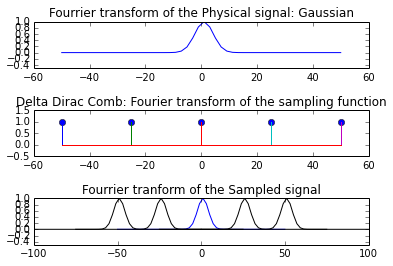

In [5]:
fft_gau = np.fft.fftshift(np.abs(np.fft.fft(g)))
fft_gau = fft_gau/fft_gau.max()


fig = plt.figure()
fig.subplots_adjust(hspace=.9)


ax1 = fig.add_subplot(311)
ax1.plot(x,fft_gau)
plt.ylim(-0.5,fft_gau.max())
plt.title("Fourrier transform of the Physical signal: Gaussian")


## delta dirac comb parameter
nb_sample = 5
deltacom = np.ones(nb_sample)
x2 = np.linspace(-50,50,nb_sample)
ax2 = fig.add_subplot(312)
markerline, stemlines, baseline = ax2.stem(x2, deltacom, '-')
plt.title("Delta Dirac Comb: Fourier transform of the sampling function")
plt.ylim(-0.5,1.5)


## sampled Gaussian
ax3 = fig.add_subplot(313)
ax3.plot(x-0,fft_gau,'b')
ax3.plot(x-25.,fft_gau, 'k')
ax3.plot(x+25,fft_gau, 'k')
ax3.plot(x-50.,fft_gau, 'k')
ax3.plot(x+50,fft_gau, 'k')
plt.ylim(-0.5,fft_gau.max())
plt.title("Fourrier tranform of the Sampled signal")
plt.show()


The Fourier transform of the physical signal (Top plot). The Fourier transform of the Dirac Com (centre plot). The Fourier transform of the observed signal (bottoom plot).

The plot shows that, the Fourier tranform of the observed signal is a supperposition of the Fourier tranform of the physical signal at each point in the Dirac Comb. At the point $k=0$ (the blue curve) is the Fourier transform of the physical signal, and all other copies at point $k\neq 0$ are aliasing copies. Which shows that any reconstruction of $d_r$ from $d_s$ requires the suppression of the aliased spectra i.e all copies of $\mathcal{F}^{}\big\{d_r\big\}$ for which $k\neq 0$.



A method to suppress the aliased copies is to multiply $\mathcal{F}^{}\big\{d_s\big\}$, by a tophat window, as a tophat window is unity in the pass-band (area of which $k=0$) and zero in the stop-band (area of which $k\neq 0$).

Note that, a complete reconstruction of $d_r$ requires the absence of overlapping copies of the aliased spectra with the Fourier transform of the physical signal i.e $\mathcal{F}^{}\big\{d_r\big\}$ for which $k=0$. Otherwise, $d_r$ cannot be uniquely reconstructed. The following conditions must hold for a unique recovery:

1. The observed signal must be band-limited in order to avoid that $\mathcal{F}^{}\big\{d_r\big\}(y)$ at point $k=0$ extends infinitely and overlaps with its aliasing copies.
2. The sampling frequency $\Delta y$ must be greater than twice the highest frequency $f_s$ contained in the signal ($\Delta y\geq 2 f_s$). The quantity $2 f_s$ is the minimum sampling frequency or the  Nyquist rate  required to avoids aliasing.

We demonstrate this in the following example:


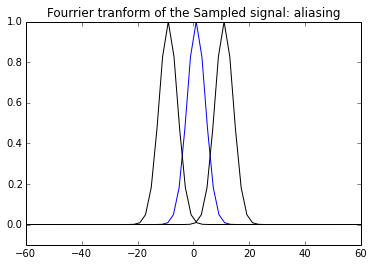

In [6]:
## sampled Gaussian
plt.plot(x-0,fft_gau,'b')
plt.plot(x-10.,fft_gau, 'k')
plt.plot(x+10,fft_gau, 'k')
plt.ylim(-0.1,fft_gau.max())
plt.title("Fourrier tranform of the Sampled signal: aliasing")
plt.show()



Let us now supose that these conditions are satisfied and that  $\Pi^{}$ is a tophat window, given by

$$
\begin{equation}
\Pi^{}(y) = \bigg \{ \begin{array}{cl}
1, &  k=0 \\
0, & \mathrm{otherwise}
\end{array}
\end{equation}
$$

Let us introduce the observed signal $d_o$ and multiply Eq.7 by $\Pi^{}$. 

$$
\begin{alignat}{2}
\mathcal{F}\big\{d_o\big\}(y) &=\Pi^{}(y)\mathcal{F}^{}\big\{d_s\big\}(y),~~~~ Eq.8
\end{alignat}
$$

which will lead to

$$
\begin{alignat}{2}
d_o(x) &= \Bigg(\mathcal{F}^{-1}\{ \Pi^{}\}\circ d_s\Bigg)(x)~~~~ Eq.9
\end{alignat}
$$

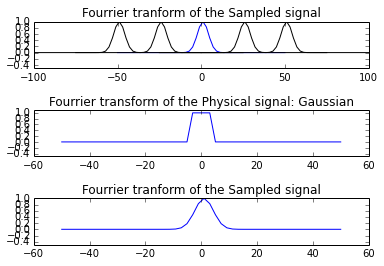

In [7]:
fft_gau = np.fft.fftshift(np.abs(np.fft.fft(g)))
fft_gau = fft_gau/fft_gau.max()


fig = plt.figure()
fig.subplots_adjust(hspace=.9)


## sampled Gaussian
ax3 = fig.add_subplot(311)
ax3.plot(x-0,fft_gau,'b')
ax3.plot(x-25.,fft_gau, 'k')
ax3.plot(x+25,fft_gau, 'k')
ax3.plot(x-50.,fft_gau, 'k')
ax3.plot(x+50,fft_gau, 'k')
plt.ylim(-0.5,fft_gau.max())
plt.title("Fourrier tranform of the Sampled signal")


ax1 = fig.add_subplot(312)
boxcar = np.zeros(len(x))
boxcar[len(x)/2-2:len(x)/2+2]=1.
ax1.plot(x,boxcar)
plt.ylim(-0.5,1.1)
plt.title("Fourrier transform of the Physical signal: Gaussian")


## delta dirac comb parameter
ax3 = fig.add_subplot(313)
ax3.plot(x-0,fft_gau,'b')
plt.ylim(-0.5,fft_gau.max())
plt.title("Fourrier tranform of the Sampled signal")

plt.show()


Since there is no overlapping aliasing spectrum with $\mathcal{F}^{}\big\{d_r\big\}(y)$ at the point $k=0$, one can still write Eq.8 as follows

$$
\begin{alignat}{2}
\mathcal{F}\big\{d_o\big\}(y)&=\Pi^{[k]}(y)\mathcal{F}^{}\big\{d_s\big\}(y)\\
	      &\simeq \Pi^{[k]}(y)\Bigg(\mathcal{F}^{}\big\{d_r\big\}(y) + \sum_{k=-\infty, k\neq0}^{+\infty}\mathcal{F}^{}\big\{d_r\big\}(y-k\Delta y)\Bigg)\\
	    &\simeq\Pi^{[k]}(y)\mathcal{F}^{}\big\{d_r\big\}(y).~~~~ Eq.10
\end{alignat}
$$


Note from the subtitution that $\Pi^{[k]}(y)\sum_{k=-\infty, k\neq0}^{+\infty}\mathcal{F}^{}\big\{d_r\big\}(y-k\Delta y)=0$. We can
rewrite Eq.10 as a convolution

$$
\begin{alignat}{2}
d_o(x) &\simeq\Bigg(\mathcal{F}^{-1}\{ \Pi^{[k]}\}\circ d_r\Bigg)(x).~~~~ Eq.11
\end{alignat}
$$

Solving  Eq.9 equal to Eq.11 we have

$$
\begin{alignat}{2}
d_s&\simeq d_r.
\end{alignat}
$$

The physical signal can be reconstructed from the observed signal if all conditions are satisfied. However, ideal sampling can not be applicable in real life problems. This is due to the convolution of the physical signal with a low pass taper which is the sinc filter ($\mathcal{F}^{-1}\{ \Pi^{}\}$) and thereby could only be represented in finite support.


***
* Next: [2.10 Linear Algrebra](2_10_linear_algebra.ipynb)
***